In [1]:
import sys
import numpy as np
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.vision.data import *
from fastai.metrics import error_rate
from fastai.data.external import *
from fastai.data.transforms import *

In [25]:
path = untar_data(URLs.PETS); path

Path('/Users/subarnajoshi/.fastai/data/oxford-iiit-pet')

In [26]:
path.ls()

(#3) [Path('/Users/subarnajoshi/.fastai/data/oxford-iiit-pet/images'),Path('/Users/subarnajoshi/.fastai/data/oxford-iiit-pet/models'),Path('/Users/subarnajoshi/.fastai/data/oxford-iiit-pet/annotations')]

In [27]:
batch_size=64

In [28]:
files = get_image_files(path/"images")

In [29]:
files[0]

Path('/Users/subarnajoshi/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg')

In [30]:
np.random.seed(2)
#pat = r'^(.*)_\d+.jpg'

In [31]:
def changeLabel(pat):
    if pat[0].isupper():
        return "cat"
    else:
        return "dog"

In [32]:
dls = ImageDataLoaders.from_name_func(path, files, changeLabel,
                                   item_tfms=Resize(460),
                                   batch_size=batch_size,
                                   num_worker = 0)

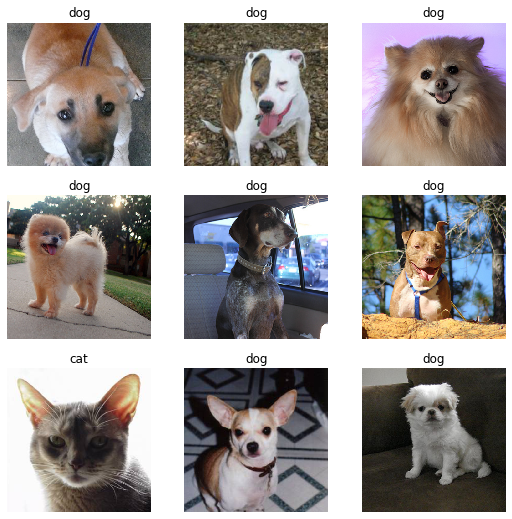

In [33]:
dls.show_batch()

In [40]:
dls = ImageDataLoaders.from_name_func(path, files, changeLabel,
                                   item_tfms=Resize(460),
                                   batch_tfms=aug_transforms(size=224),
                                   num_worker = 0)

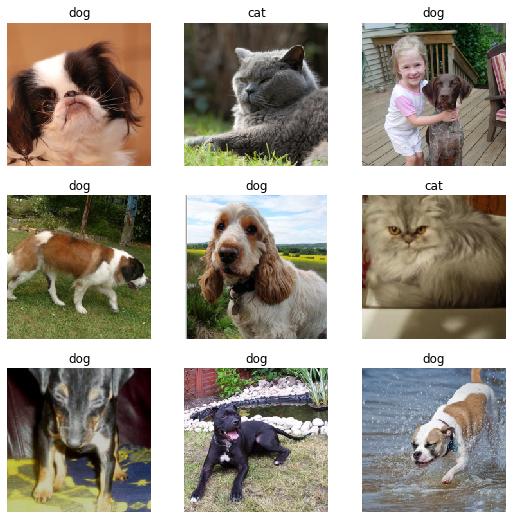

In [41]:
dls.show_batch()

In [42]:
learn = cnn_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(), metrics=error_rate)

In [43]:
#learn.lr_find()

In [44]:
#learn.fine_tune(4,3e-3)

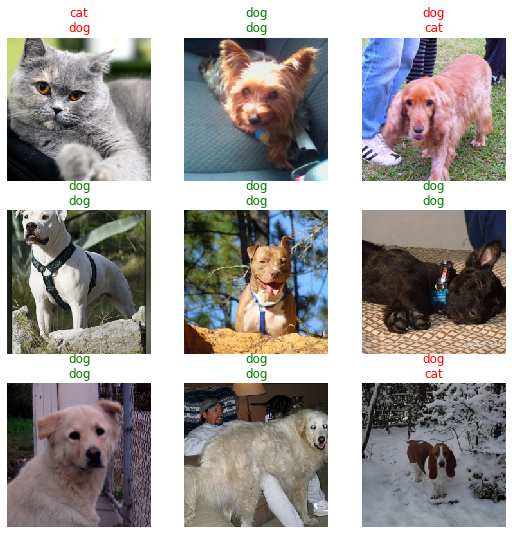

In [45]:
learn.show_results()

In [46]:
learn.predict("3.jpg")

('dog', tensor(1), tensor([0.0033, 0.9967]))

In [47]:
learn.predict("dog_looking_193004.jpg")

('dog', tensor(1), tensor([0.0137, 0.9863]))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
#interp.plot_top_losses(9, figsize=(15,10))